In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
import seaborn as sns

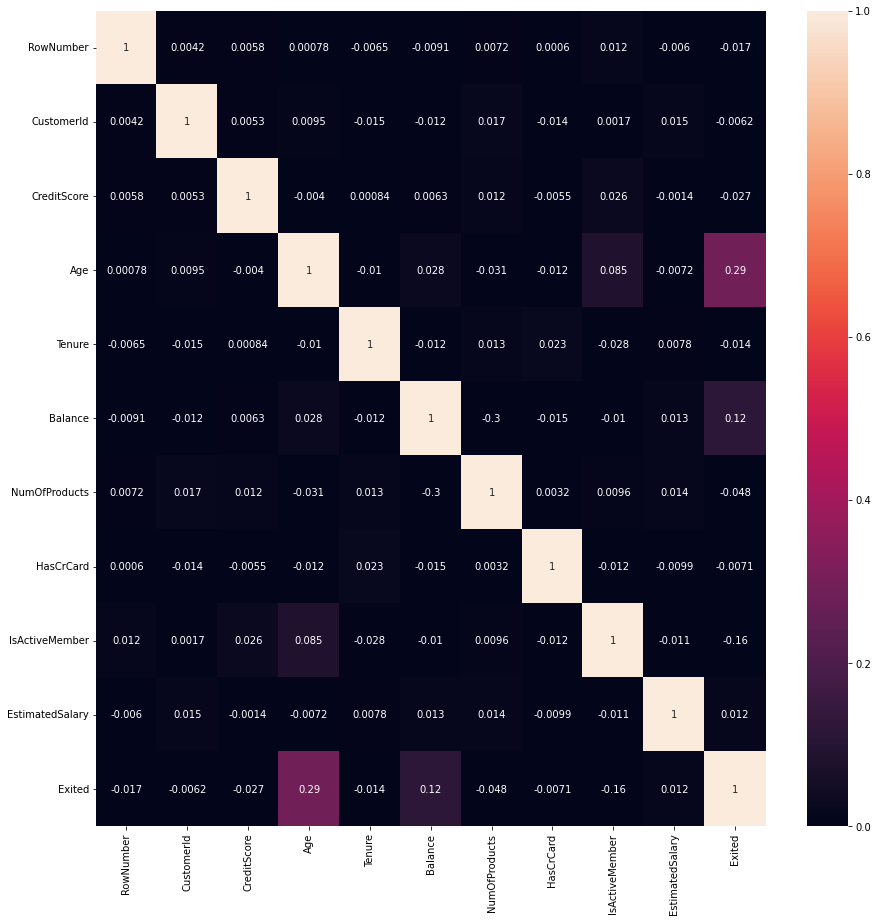

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,vmin=0,vmax=1)

In [55]:
x=data.iloc[:,3:13].values
y=data.iloc[:,13].values

In [56]:
x.shape

(10000, 10)

In [57]:
y.shape

(10000,)

In [58]:
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [59]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labeler=LabelEncoder()
x[:,1]=labeler.fit_transform(x[:,1])
labeler2=LabelEncoder()
x[:,2]=labeler2.fit_transform(x[:,2])

In [60]:
x

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [61]:
from sklearn.compose import ColumnTransformer 

ct = ColumnTransformer([('Geography',OneHotEncoder(categories='auto'),[1])],remainder='passthrough')
x = ct.fit_transform(x)

In [62]:
x.shape

(10000, 12)

In [63]:
x=x[:,1:]

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=134)

In [101]:
x_test.shape

(3000, 11)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

##Creating Ann

In [72]:
from tensorflow import keras

In [73]:
from keras.models import Sequential
from keras.layers import Dense

In [88]:
model=Sequential()
model.add(Dense(6, kernel_initializer='he_uniform', activation='relu', input_shape=(11,)))
model.add(Dense(6, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid'))

In [93]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [94]:
model.fit(x_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
700/700 [==============================] - 1s 1ms/step - loss: 0.6034 - accuracy: 0.6923
Epoch 2/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4689 - accuracy: 0.7993
Epoch 3/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4357 - accuracy: 0.8096
Epoch 4/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4137 - accuracy: 0.8204
Epoch 5/100
700/700 [==============================] - 1s 1ms/step - loss: 0.3947 - accuracy: 0.8324
Epoch 6/100
700/700 [==============================] - 1s 1ms/step - loss: 0.3793 - accuracy: 0.8409
Epoch 7/100
700/700 [==============================] - 1s 1ms/step - loss: 0.3687 - accuracy: 0.8459
Epoch 8/100
700/700 [==============================] - 1s 1ms/step - loss: 0.3629 - accuracy: 0.8490
Epoch 9/100
700/700 [==============================] - 1s 1ms/step - loss: 0.3591 - accuracy: 0.8523
Epoch 10/100
700/700 [==============================] - 1s 1ms/step - loss: 0.3567 - accura

In [95]:
y_pred=model.predict(x_test)

94/94 [==============================] - 0s 2ms/step


In [96]:
y_pred=(y_pred>0.5)

In [98]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [99]:
cm

array([[2326,   71],
       [ 330,  273]])

In [102]:
accuracy=2599/3000

In [103]:
print(accuracy)

0.8663333333333333
